In [20]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\tangu\Downloads\Advertising.csv")
df.head(3)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


Initial Data Analysis

In [3]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Checking if there are any null values

In [4]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Data Cleaning

In [5]:
df.drop(['Unnamed: 0'],axis='columns',inplace=True)
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Exploratory Data Analysis

1.Relation between TV and Sales

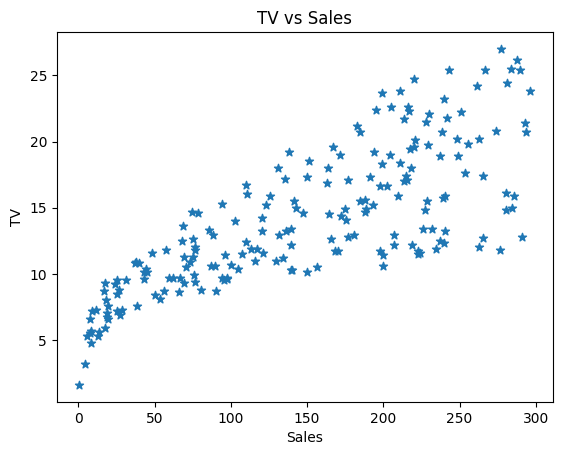

In [6]:
import matplotlib.pyplot as plt

plt.scatter(x=df.TV,y=df.Sales,marker='*')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.title('TV vs Sales')
plt.show()

2.Relation between Radio and Sales

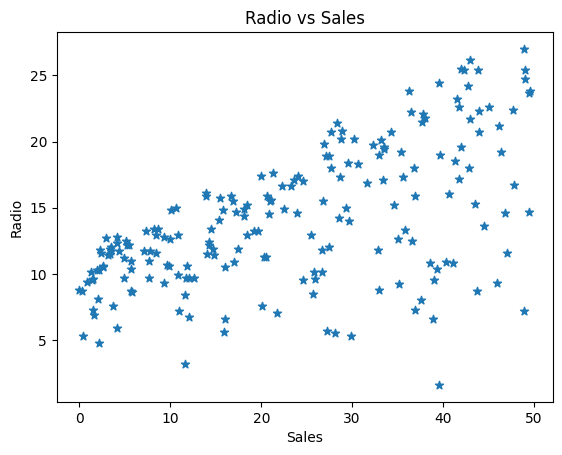

In [7]:
plt.scatter(x=df.Radio,y=df.Sales,marker='*')
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.title('Radio vs Sales')
plt.show()

3.Relation between Newspaper and Sales

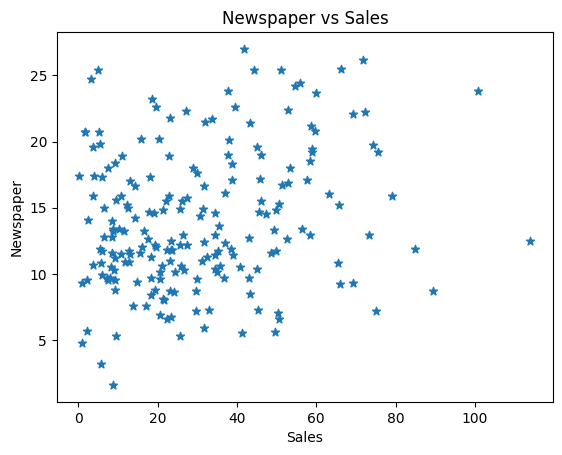

In [8]:
plt.scatter(x=df.Newspaper,y=df.Sales,marker='*')
plt.xlabel('Sales')
plt.ylabel('Newspaper')
plt.title('Newspaper vs Sales')
plt.show()

PairGrid Plot

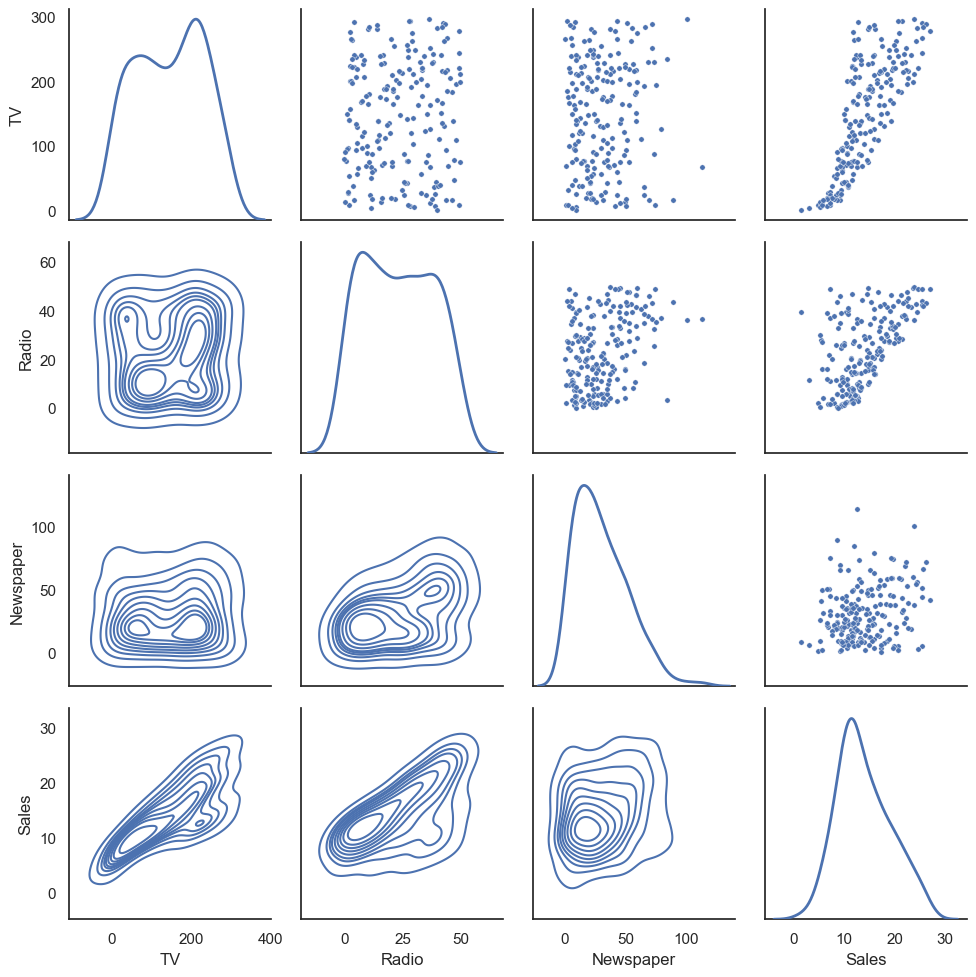

In [9]:
import seaborn as sns
sns.set_theme(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

Jointplot for TV vs Sales

<Figure size 2000x2000 with 0 Axes>

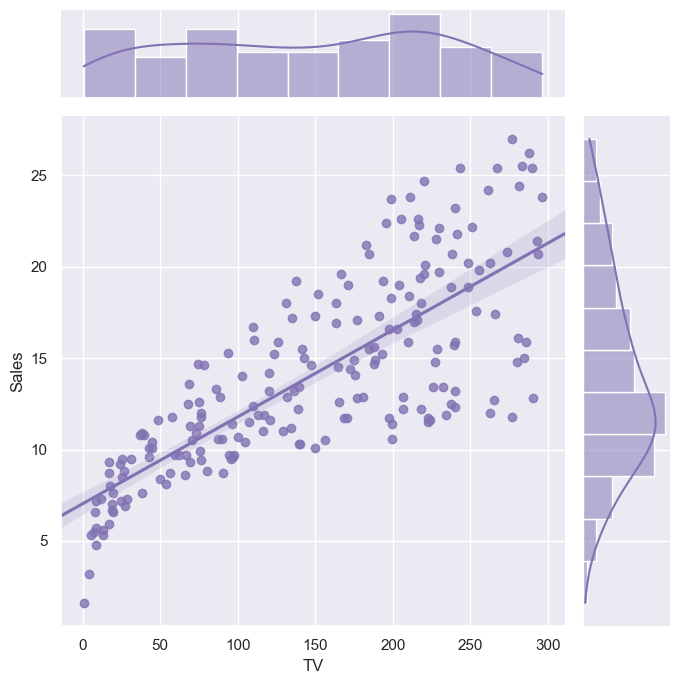

In [10]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,20))
g = sns.jointplot(x=df.TV, y=df.Sales, data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

Jointplot for Radio vs Sales

<Figure size 2000x2000 with 0 Axes>

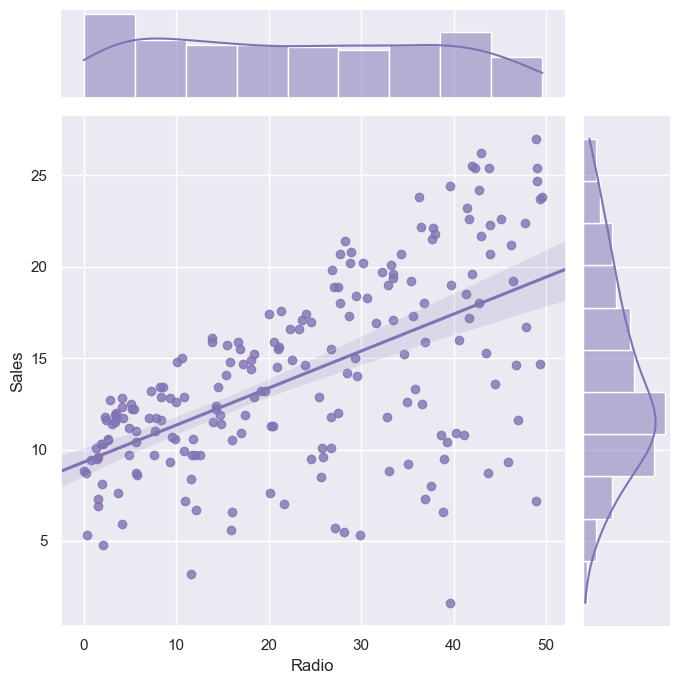

In [11]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,20))
g = sns.jointplot(x=df.Radio, y=df.Sales, data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

Jointplot for Newspaper vs Sales

<Figure size 2000x2000 with 0 Axes>

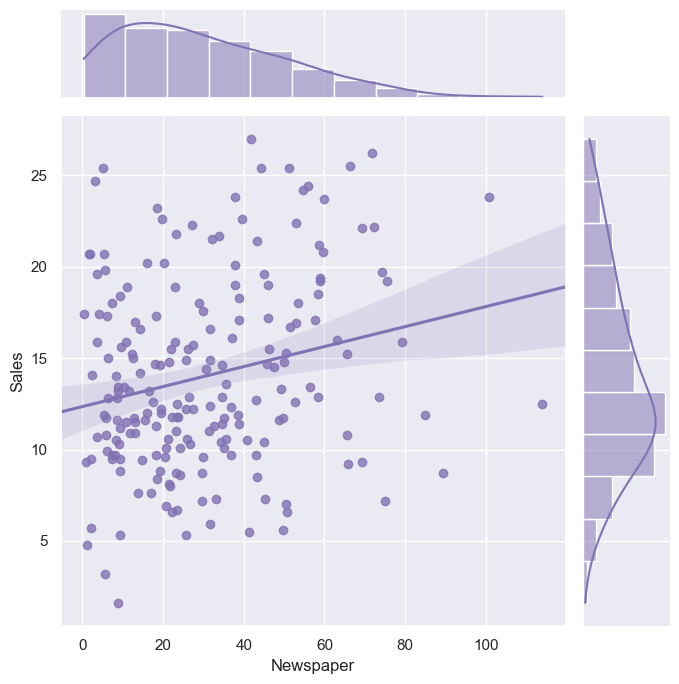

In [12]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,20))
g = sns.jointplot(x=df.Newspaper, y=df.Sales, data=df,
                  kind="reg", truncate=False,
                  color="m", height=7)

Building Model

In [13]:
X = df.drop(['Sales'],axis='columns')
y = df['Sales']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

1.Using Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_scaled,y_train) # type: ignore
y_pred_lr = model_lr.predict(X_test_scaled)


ms_lr = round(model_lr.score(X_test_scaled,y_test)*100,2)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("R² Score:", r2_lr)
print("Model Score:",ms_lr)
print("predicted values:",y_pred_lr)

MAE: 1.7677050331419957
MSE: 6.209703302450423
R² Score: 0.7725767303950063
Model Score: 77.26
predicted values: [17.9489591  22.37455048 22.79211282 12.44480854 23.39042071 14.83197855
 22.41429453  9.11687693 14.88087711 16.59840646 10.70062224  8.32770263
 15.81930785 10.63623577 11.17830817 13.62036299 10.56405044 17.60788591
 11.9306182  20.08370877 21.03046413 15.18558856 14.01570051 22.72927318
  9.38736665  7.46119419 22.14157907 13.42736996 10.7854383  10.20855266
 13.812931   11.62479347 22.88839367 14.21798925 19.50138949 21.37526272
 15.70694939 22.18444764 12.49460149  6.27235101 11.2187167  14.02545825
 11.78783597  9.83068029 14.77398255  7.0867009  10.96270525 15.60561131
 10.41942346 13.24301495 17.09725145 13.27873206 14.77071021 12.69001793
  8.17105955 11.45876216 11.10759395 25.36076159  9.42598722 13.79984117]


2.Using DecisionTreeRegressor

In [28]:
from sklearn.tree import DecisionTreeRegressor

model_dr = DecisionTreeRegressor()
model_dr.fit(X_train,y_train) # type: ignore
y_pred_dr = model_dr.predict(X_test)


ms_dr = round(model_dr.score(X_test,y_test)*100,2)

mae_dr = mean_absolute_error(y_test, y_pred_dr)
mse_dr = mean_squared_error(y_test, y_pred_dr)
r2_dr = r2_score(y_test, y_pred_dr)

print("MAE:", mae_dr)
print("MSE:", mse_dr)
print("R² Score:", r2_dr)
print("Model Score:",ms_dr)
print("predicted values:",y_pred_dr)

MAE: 1.0350000000000004
MSE: 1.8085000000000002
R² Score: 0.9337657593208473
Model Score: 93.38
predicted values: [19.  23.8 17.6  5.3 23.8 15.3 22.6 10.1 12.  16.6  8.5  8.6 11.7  3.2
 10.3 12.9  5.3 17.3  9.7 20.2 17.6 15.3 10.8 23.8  9.9  8.7 22.6 12.2
 10.6  4.8 11.4 10.1 23.8  9.3 15.9 23.8 10.4 17.6 12.4  6.7 11.2 12.6
 10.4 10.1 11.8  8.8  9.7 15.   9.7 11.8 13.6 12.9  5.3  5.3  8.8 11.6
  9.9 24.2  6.6 11.4]


3.Using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rr = RandomForestRegressor()
model_rr.fit(X_train,y_train) # type: ignore
y_pred_rr = model_rr.predict(X_test)


ms_rr = round(model_rr.score(X_test,y_test)*100,2)

mae_rr = mean_absolute_error(y_test, y_pred_rr)
mse_rr = mean_squared_error(y_test, y_pred_rr)
r2_rr = r2_score(y_test, y_pred_rr)

print("MAE:", mae_rr)
print("MSE:", mse_rr)
print("R² Score:", r2_rr)
print("Model Score:",ms_rr)
print("predicted values:",y_pred_rr)

MAE: 0.5958999999999988
MSE: 0.49958696666666536
R² Score: 0.9817031996735595
Model Score: 98.17
[17.687 21.622 20.606  6.471 23.235 13.006 22.483  9.635 12.156 15.979
  8.659  9.083 12.035  4.225 10.541 12.479  5.36  16.616 11.078 19.57
 20.163 13.094 10.537 22.246 10.031  9.089 22.309 12.655 10.122  4.891
 11.55  10.82  21.867  8.405 15.219 20.18  12.276 20.706 12.608  7.556
 11.601 12.85  10.104  9.779 11.851  8.984 10.825 15.332 10.814 11.546
 13.682 12.528  6.337  5.588  9.01  11.349 10.802 25.146  6.845 12.059]


4.Using Lasso Regression

In [40]:
from sklearn.linear_model import Lasso

model_la = Lasso(alpha=15)
model_la.fit(X_train,y_train) # type: ignore
y_pred_la = model_la.predict(X_test)


ms_la = round(model_la.score(X_test,y_test)*100,2)

mae_la = mean_absolute_error(y_test, y_pred_la)
mse_la = mean_squared_error(y_test, y_pred_la)
r2_la = r2_score(y_test, y_pred_la)

print("MAE:", mae_la)
print("MSE:", mse_la)
print("R² Score:", r2_la)
print("Model Score:",ms_la)
print("predicted values:",y_pred_la)

MAE: 1.4148420482140618
MSE: 3.5080316865339545
R² Score: 0.8715223582880929
Model Score: 87.15
predicted values: [15.86307244 19.36946627 20.9642173  10.08688418 20.60596212 12.54448021
 19.78022244  8.36940326 14.65002838 15.16087963  9.30232575  7.85214386
 15.16714104  8.8895787  10.93481069 13.00253387  8.73213293 16.22851733
 10.60409103 18.48627235 18.78504076 12.44463229 11.66163075 20.25644265
  8.8764627   7.24620644 19.51986907 12.57026423  9.9857203   8.65982053
 13.57811703 10.36991401 19.74443152 11.21066327 18.5336687  19.42201047
 12.99010834 20.22322332 11.65230188  6.08202299 10.67295298 13.49201371
 10.07648961  9.02764395 14.5858262   6.81772393  9.83313202 14.15841561
  9.9205945  11.60140875 14.24141604 12.83280152 11.549643   10.18537293
  8.06577735 10.98046177 10.08537517 22.68359023  8.19714719 13.60341919]


5.Using Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

model_ri = Ridge(alpha=1,solver="svd")
model_ri.fit(X_train,y_train) 
y_pred_ri = model_ri.predict(X_test)


ms_ri = round(model_ri.score(X_test,y_test)*100,2)

mae_ri = mean_absolute_error(y_test, y_pred_ri)
mse_ri = mean_squared_error(y_test, y_pred_ri)
r2_ri = r2_score(y_test, y_pred_ri)

print("MAE:", mae_ri)
print("MSE:", mse_ri)
print("R² Score:", r2_ri)
print("Model Score:",ms_ri)
print("predicted values:",y_pred_ri)

MAE: 1.5115692490721149
MSE: 3.795744923847297
R² Score: 0.860985190576293
Model Score: 86.1
predicted values: [16.5651719  21.18680148 21.55096555 10.88844261 22.19995909 13.35506085
 21.19535414  7.35094829 13.27670825 15.12459523  9.01383554  6.52672854
 14.30451752  8.96938205  9.45833721 12.00581067  8.91529464 16.15594507
 10.29608383 18.72412889 19.76832089 13.77510038 12.49477994 21.53477811
  7.60915171  5.61341707 20.91620274 11.80660709  9.08155194  8.51332177
 12.17747775  9.96919118 21.72865671 12.77715034 18.10200563 20.07469336
 14.25985765 20.93838991 10.83961611  4.38335408  9.51437843 12.4055307
 10.17026322  8.09140318 13.16523981  5.22553112  9.28965629 14.09308389
  8.69163839 11.66063136 15.71678095 11.63250779 13.35241416 11.15229179
  6.33778999  9.76292719  9.41974144 24.25414235  7.69518299 12.15427661]


6.Using GradientBoostingRegressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

model_gr = GradientBoostingRegressor()
model_gr.fit(X_train,y_train) 
y_pred_gr = model_gr.predict(X_test)


ms_gr = round(model_gr.score(X_test,y_test)*100,2)

mae_gr = mean_absolute_error(y_test, y_pred_gr)
mse_gr = mean_squared_error(y_test, y_pred_gr)
r2_gr = r2_score(y_test, y_pred_gr)

print("MAE:", mae_gr)
print("MSE:", mse_gr)
print("R² Score:", r2_gr)
print("Model Score:",ms_gr)
print("predicted values:",y_pred_gr)


MAE: 0.5510406271844126
MSE: 0.5338569291889173
R² Score: 0.9804481015559126
Model Score: 98.04
predicted values: [17.11177509 21.89584916 20.31149838  6.18264522 23.52855497 12.969581
 22.7833106   9.34468943 11.76430183 15.90246377  8.35901421  8.83027211
 12.54416268  2.88707367 10.42048147 12.11370977  4.64608606 16.57238947
 11.31385106 19.16646081 20.3347444  13.23980178 10.6955329  22.6768956
  9.95845348  8.56160215 22.82893407 12.50256299 10.11953957  4.41593948
 11.40986866 11.31385106 22.26426487  8.86464478 15.59768903 20.65114169
 12.41021231 20.19353127 12.44261317  7.27286007 10.79548005 12.64358481
 10.11585805  9.43597287 11.75264503  8.10889839 10.46473459 14.19871042
 10.25025792 12.43543084 14.60987851 12.06376764  6.36161121  4.59158905
  8.85128696 10.88775312 10.22398563 25.32574856  7.03554193 11.78598809]


Comparing all models

In [59]:
models = [
    {
        'Model Name':"LinearRegression",
        'Model Score':ms_lr,
        'MAE':mae_lr,
        'MSE':mse_lr,
        'R² Score':r2_lr
    },
    {
        'Model Name':"DecisionTreeRegressor",
        'Model Score':ms_dr,
        'MAE':mae_dr,
        'MSE':mse_dr,
        'R² Score':r2_dr
    },
    {
        'Model Name':"RandomForestRegressor",
        'Model Score':ms_rr,
        'MAE':mae_rr,
        'MSE':mse_rr,
        'R² Score':r2_rr
    },
    {
        'Model Name':"Lasso",
        'Model Score':ms_la,
        'MAE':mae_la,
        'MSE':mse_la,
        'R² Score':r2_la
    },
    {
        'Model Name':"Ridge",
        'Model Score':ms_ri,
        'MAE':mae_ri,
        'MSE':mse_ri,
        'R² Score':r2_ri
    },
    {
        'Model Name':"GradientBoostingRegressor",
        'Model Score':ms_gr,
        'MAE':mae_gr,
        'MSE':mse_gr,
        'R² Score':r2_gr
    },
]

Score_card = pd.DataFrame(models).sort_values(by='Model Score',ascending=False)
Score_card

,Model Name,Model Score,MAE,MSE,R² Score
2,RandomForestRegressor,98.17,0.595900,0.499587,0.981703
5,GradientBoostingRegressor,98.04,0.551041,0.533857,0.980448
1,DecisionTreeRegressor,93.38,1.035000,1.808500,0.933766
3,Lasso,87.15,1.414842,3.508032,0.871522
4,Ridge,86.10,1.511569,3.795745,0.860985
0,LinearRegression,77.26,1.767705,6.209703,0.772577


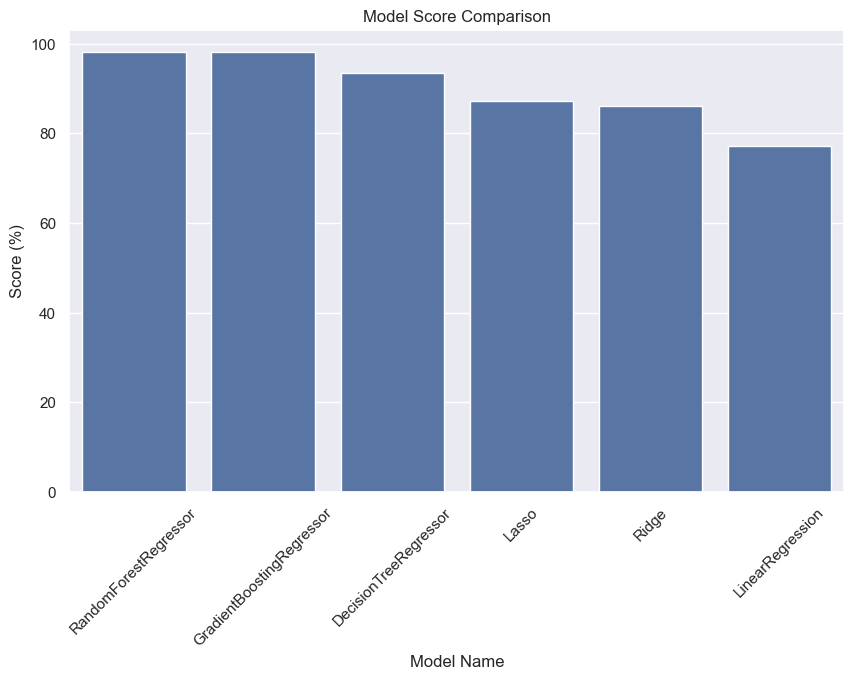

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(data=Score_card, x='Model Name', y='Model Score')
plt.title("Model Score Comparison")
plt.xticks(rotation=45)
plt.ylabel("Score (%)")
plt.show()

The best model is RandomForestRegressor